In [1]:
# Mount google drive so that to connect drive with google colab where we are running this file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import required libraries
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

In [3]:
img_width, img_height=192,192
input_shape=(img_height,img_width)
train_data_dir='path to dataset'
batch_size=48;

In [4]:

datagen=ImageDataGenerator(
    rescale=1./244,
    validation_split=0.20,
)

train_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="training",
    class_mode='categorical'   
)

val_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="validation",
    class_mode='categorical'

)

Found 4873 images belonging to 10 classes.
Found 1213 images belonging to 10 classes.


**VGG16**

In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(192,192,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# dropout with 0.1
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# # dropout with 0.2
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# dropout with 0.3
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))


In [6]:

from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


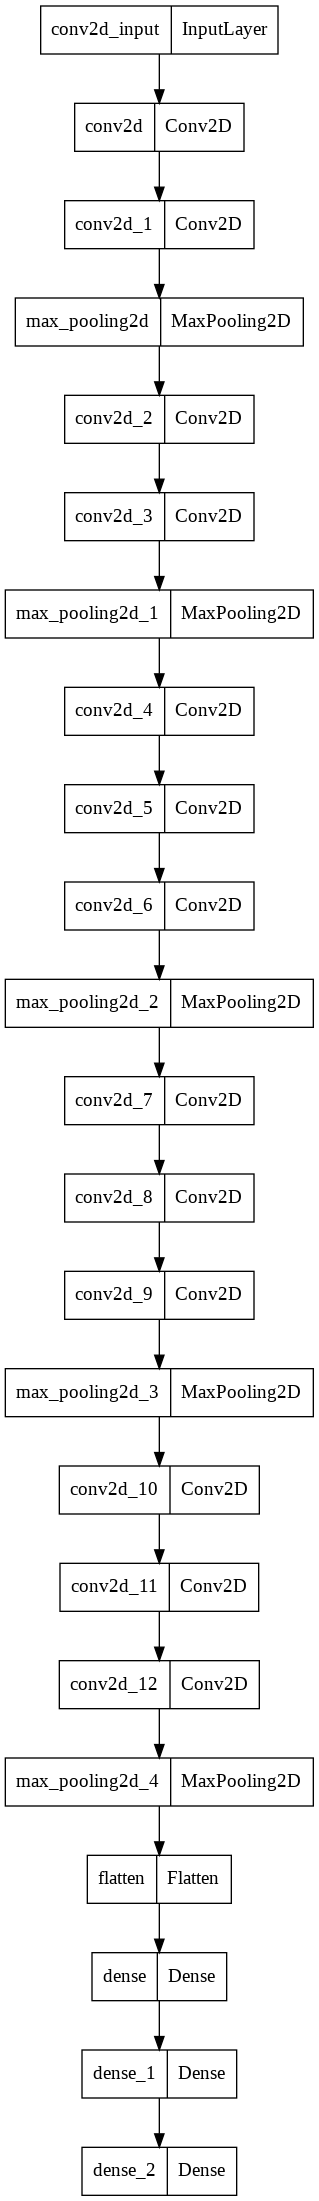

In [7]:
# you can find the architecture summary of our model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
from keras.callbacks import History,ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("path to save model/cnn_m.h5", monitor='val_acc', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max',baseline=0.95)
history=History()
model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=40,callbacks=[history],
    validation_data=validation_generator,
    validation_steps=2   
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/40
200/200 [==============================] - 2070s 10s/step - loss: 1.7804 - accuracy: 0.3414 - val_loss: 0.9557 - val_accuracy: 0.6562
Epoch 2/40
200/200 [==============================] - 681s 3s/step - loss: 0.4851 - accuracy: 0.8520 - val_loss: 0.4117 - val_accuracy: 0.8854
Epoch 3/40
200/200 [==============================] - 281s 1s/step - loss: 0.1953 - accuracy: 0.9448 - val_loss: 0.1699 - val_accuracy: 0.9688
Epoch 4/40
200/200 [==============================] - 215s 1s/step - loss: 0.1109 - accuracy: 0.9695 - val_loss: 0.2050 - val_accuracy: 0.9375
Epoch 5/40
200/200 [==============================] - 215s 1s/step - loss: 0.0768 - accuracy: 0.9772 - val_loss: 0.1092 - val_accuracy: 0.9688
Epoch 6/40
200/200 [==============================] - 211s 1s/step - loss: 0.0540 - accuracy: 0.9851 - val_loss: 0.1140 - val_accuracy: 0.9688
Epoch 7/40
200/200 [==============================] - 212s 1s/step - loss: 0.0452 - accuracy: 0.9869 - val_loss: 0.2653 - val_accuracy: 0.97

In [ ]:
# print(history.history.keys())
import os, cv2
from matplotlib import pyplot as plt
import numpy as np
classes=["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
test_data_dir='path to test dataset/'
l= os.listdir(test_data_dir)
batch_size=48
for i in range(len(l)):
  path=test_data_dir+l[i]
  print(path)
  img=cv2.imread(path)
  print(np.shape(img))
  dim = (192, 192)
  img=cv2.resize(img, dim)
  print(np.shape(img))
  img=np.reshape(img,(-1,192,192,3))
  img_class = model.predict(img)
  img_class=np.argmax(img_class, axis=1)
  prediction = img_class[0]
  classname = img_class[0]
  img=np.reshape(img,(192,192,3))
  print("Class: ",classname)
  plt.title(classname)
  plt.imshow(img)
  plt.show()
  i=i+10

Output hidden; open in https://colab.research.google.com to view.

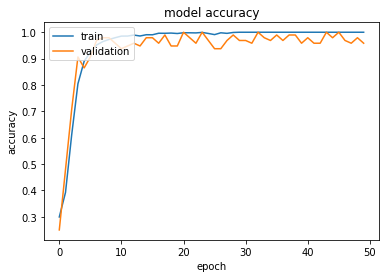

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

Text(0.5, 1.0, 'Loss Curves')

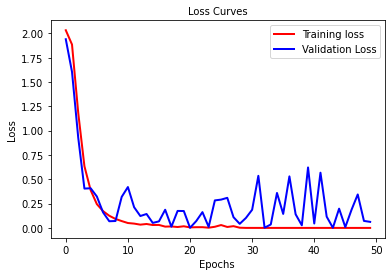

In [ ]:
#plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
#plt.grid()
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)